In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

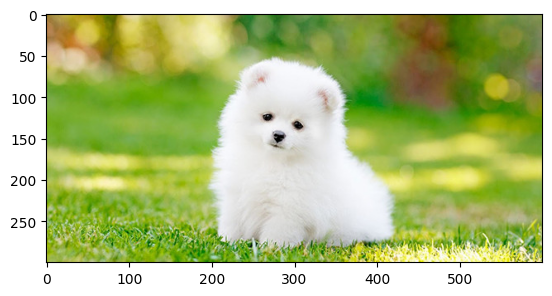

In [28]:
path_dog = os.path.join(os.getcwd(), 'media', 'dog.jpg')

dog = cv2.imread(path_dog)
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

plt.imshow(dog)

In [29]:
dog.shape

(300, 600, 3)

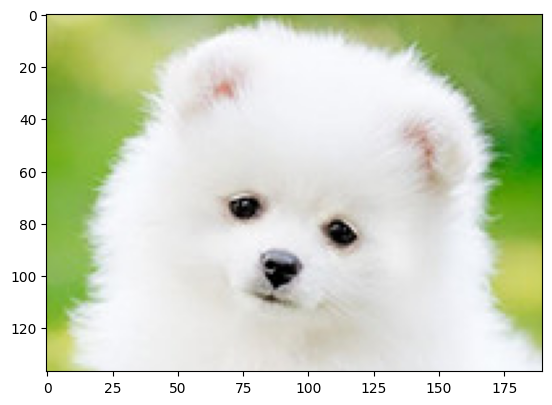

In [30]:
path_dog_face = os.path.join(os.getcwd(), 'media', 'face_dog.png')

dog_face = cv2.imread(path_dog_face)

dog_face = cv2.cvtColor(dog_face,cv2.COLOR_BGR2RGB)
plt.imshow(dog_face)

In [12]:
dog_face.shape

(384, 432, 3)

In [13]:
sum([1,2,3])

6

In [14]:
mystring = "sum"

In [15]:
mystring([1,2,3])

TypeError: 'str' object is not callable

In [16]:
eval(mystring) #artik fonsiyonu cagirabiliriz

<function sum(iterable, /, start=0)>

In [17]:
my_func = eval(mystring)

In [18]:
my_func([1,2,3])

6

In [39]:
height , width, channels = dog_face.shape

In [40]:
width

190

In [41]:
height

137

In [31]:
my_method = eval("cv2.TM_CCOEFF") #template matching methodunu tanimliyoruz
res = cv2.matchTemplate(dog,dog_face,my_method) #dog uzerinde dog_face i ariyoruz


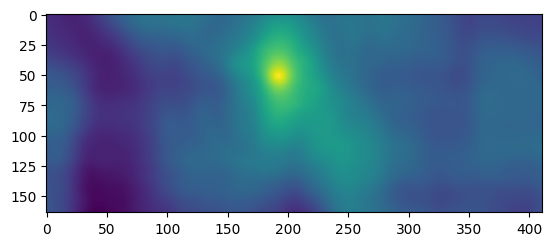

In [32]:
plt.imshow(res)

In [35]:
#Fotografin tamami
dog = cv2.imread(path_dog)
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

#Fotografin sadece yuz kismi
dog_face = cv2.imread(path_dog_face)
dog_face = cv2.cvtColor(dog_face,cv2.COLOR_BGR2RGB)

#template matching methodlarinin tutuldugu listeyi tanimliyoruz
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

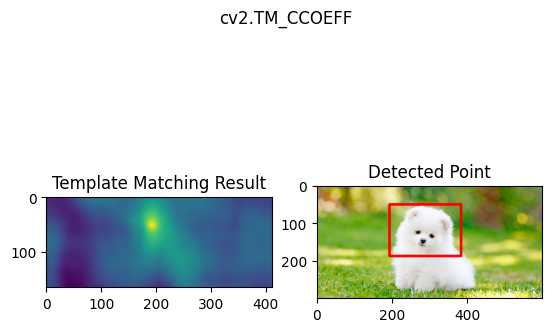

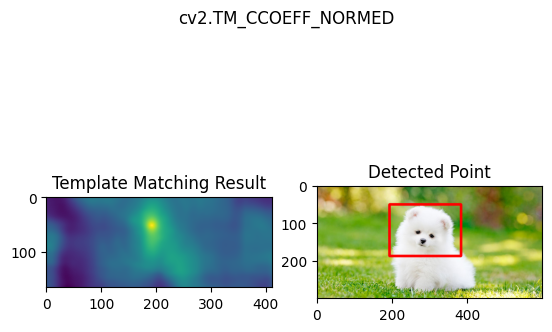

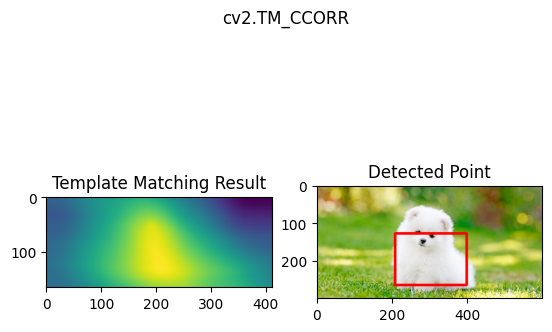

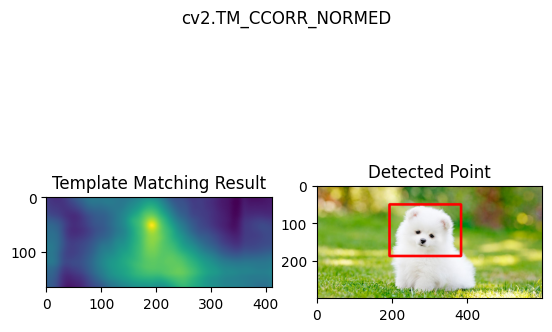

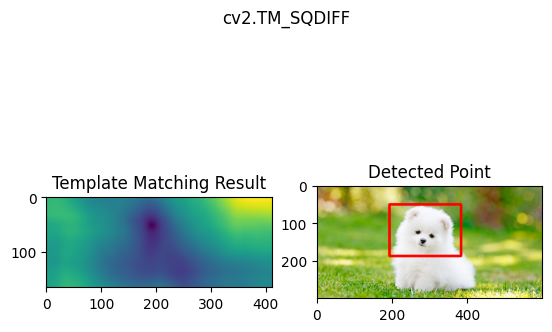

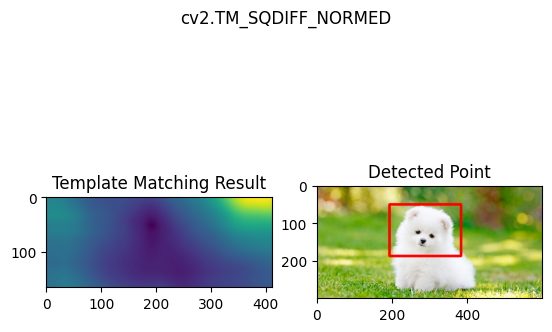

In [42]:
for m in methods: #her bir method icin dongu olusturuyoruz

    dog_copy = dog.copy() #dog uzerinde islem yapacagimiz icin kopyasini aliyoruz

    method = eval(m) #eval fonksiyonu ile stringi fonksiyona cevirebiliyoruz

    res = cv2.matchTemplate(dog_copy,dog_face,method) #dog uzerinde dog_face i ariyoruz

    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res) #buldugumuz sonuclari aliyoruz ve dikdortgen cizecegimiz koordinatlari aliyoruz

    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]: #eger methodumuz SQDIFF ise dikdortgeni min_loc ile ciziyoruz
        top_left = min_loc
    else:
        top_left= max_loc #degilse max_loc ile ciziyoruz

    bottom_right = (top_left[0]+width, top_left[1]+height) #dikdortgenin sag alt kosesini aliyoruz

    cv2.rectangle(dog_copy,top_left,bottom_right,(255,0,0),5) #dikdortgeni ciziyoruz

    plt.subplot(121) #subplot olusturuyoruz
    plt.imshow(res) #resmi gosteriyoruz
    plt.title("Template Matching Result") #baslik ekliyoruz


    plt.subplot(122) #subplot olusturuyoruz
    plt.imshow(dog_copy) #dog uzerinde dikdortgenli resmi gosteriyoruz
    plt.title("Detected Point") #baslik ekliyoruz

    plt.suptitle(m) #her bir method icin baslik ekliyoruz

    plt.show() #gosteriyoruz
    print('\n')
    print('\n') #aralik birakmak icin